In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv('C:\\Users\\This PC\\Downloads\\rain_in_australia\\weatherAUS.csv')
df.head()                          #Reading

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No  
3       NaN     18.1     26.5        No           No  
4       8.0     17.8     29.7        No           No

In [3]:
#Checking the Datatypes

In [299]:
df.dtypes         #Date datatype is in object,so need to convert it into datetime format

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [16]:
df['Date']=pd.to_datetime(df['Date'],errors='coerce')    #Conversion of date datatype into datetime

In [6]:
c=pd.DataFrame(df.dtypes,columns=['dtype'])                               #Again checking the converted dtypes
c

dtype
Date           datetime64[ns]
Location               object
MinTemp               float64
MaxTemp               float64
Rainfall              float64
Evaporation           float64
Sunshine              float64
WindGustDir            object
WindGustSpeed         float64
WindDir9am             object
WindDir3pm             object
WindSpeed9am          float64
WindSpeed3pm          float64
Humidity9am           float64
Humidity3pm           float64
Pressure9am           float64
Pressure3pm           float64
Cloud9am              float64
Cloud3pm              float64
Temp9am               float64
Temp3pm               float64
RainToday              object
RainTomorrow           object

In [7]:
#Checking for Null values

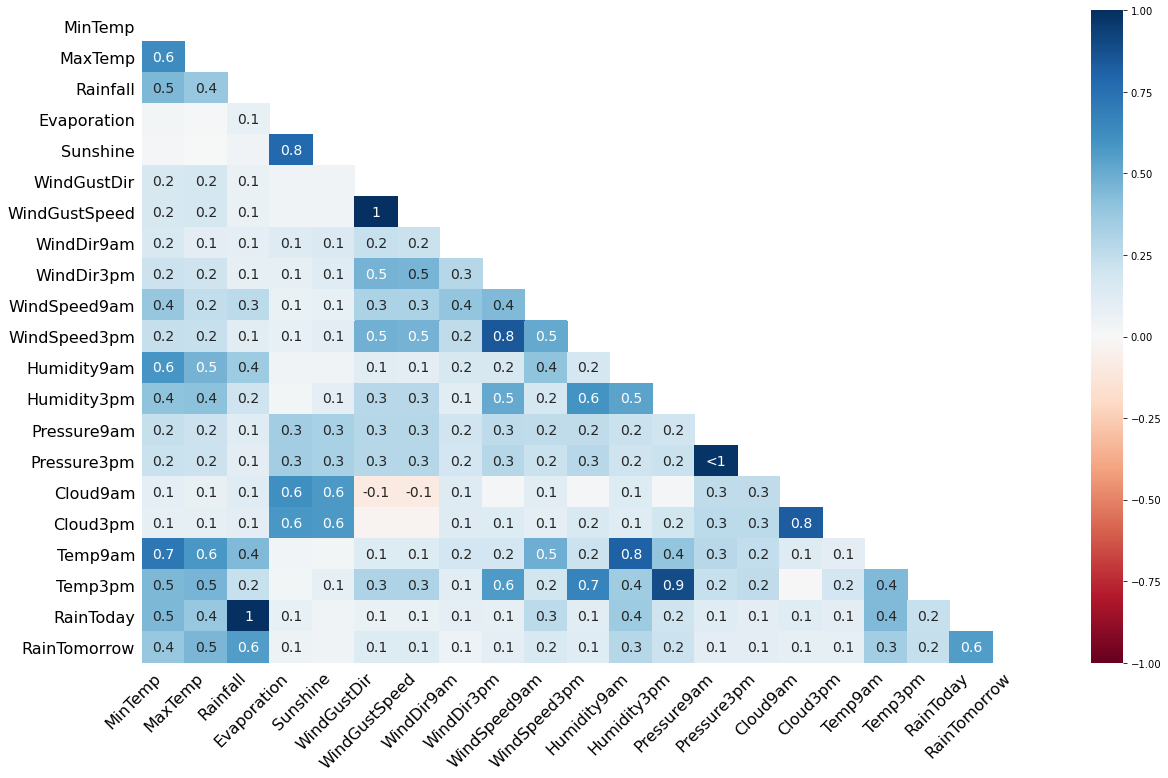

In [6]:
import missingno as msno
msno.heatmap(df)
plt.show()

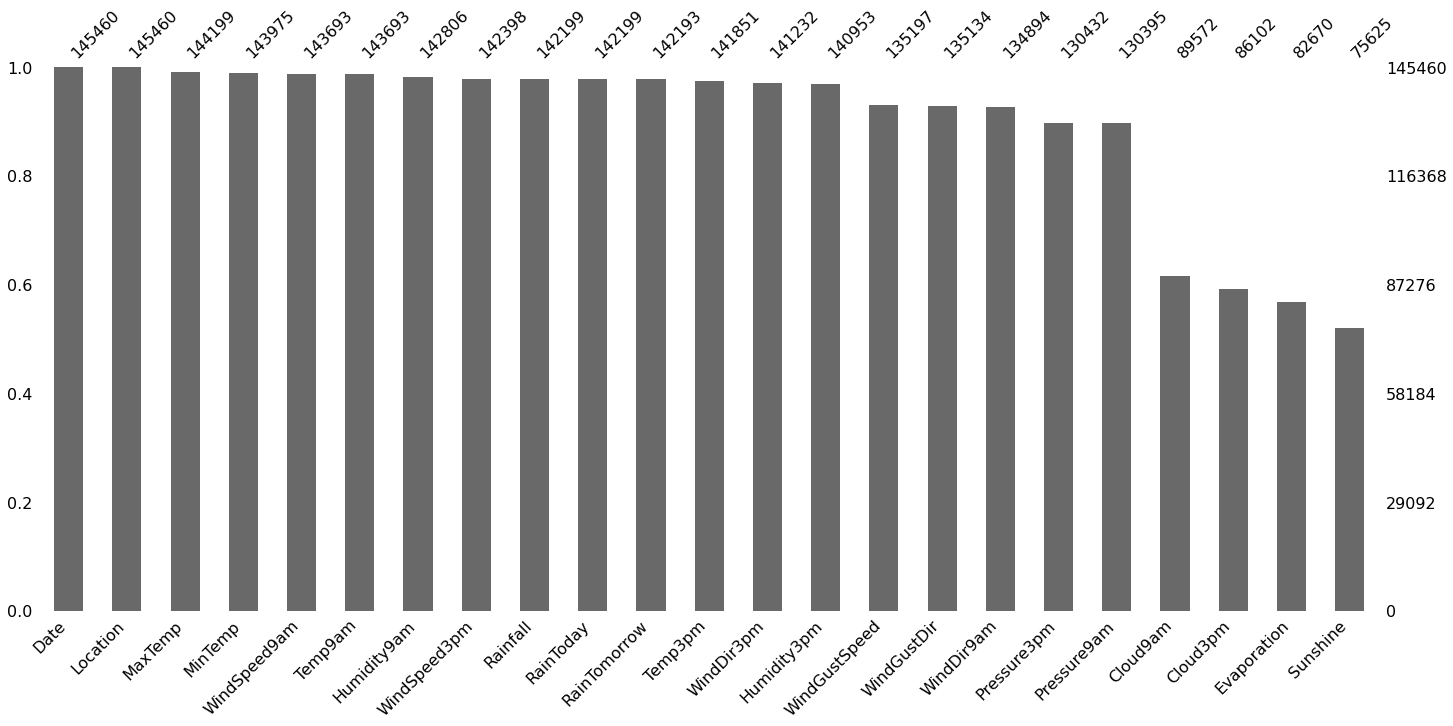

In [7]:
msno.bar(df,sort= 'descending')
plt.show()                        #Cloud3pm,sunshine,evaporation have max null values

In [7]:
n=pd.DataFrame(df.isna().sum()*100/len(df),columns=['null_value_per'])
s=pd.concat([c,n],axis=1).T
s

Date Location  MinTemp   MaxTemp Rainfall  \
dtype           datetime64[ns]   object  float64   float64  float64   
null_value_per               0        0   1.0209  0.866905  2.24185   

               Evaporation Sunshine WindGustDir WindGustSpeed WindDir9am  \
dtype              float64  float64      object       float64     object   
null_value_per     43.1665  48.0098     7.09886       7.05555    7.26385   

               WindDir3pm WindSpeed9am WindSpeed3pm Humidity9am Humidity3pm  \
dtype              object      float64      float64     float64     float64   
null_value_per    2.90664      1.21477      2.10505     1.82456     3.09845   

               Pressure9am Pressure3pm Cloud9am Cloud3pm  Temp9am  Temp3pm  \
dtype              float64     float64  float64  float64  float64  float64   
null_value_per     10.3568     10.3314  38.4216  40.8071  1.21477  2.48109   

               RainToday RainTomorrow  
dtype             object       object  
null_value_per   2.24185      2.24598

In [11]:
#Evaporation,sunshine and cloud3pm is having null values>40%
#cloud9am is also having null values around 40%
#Date and Location doesnot have Null values
#rest of the columns are having null values equal to or less than 10

In [12]:
#dropping rows for features having null values less than 5%

In [8]:
l=[]
for i in s.columns[2:]:
    if (s.iloc[1][i]<6):
        l.append(i)

In [9]:
df.dropna(subset=l,axis=0,inplace=True)

In [10]:
df.isna().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           0.000000
MaxTemp           0.000000
Rainfall          0.000000
Evaporation      41.682889
Sunshine         45.957352
WindGustDir       4.468385
WindGustSpeed     4.458727
WindDir9am        5.614830
WindDir3pm        0.000000
WindSpeed9am      0.000000
WindSpeed3pm      0.000000
Humidity9am       0.000000
Humidity3pm       0.000000
Pressure9am       8.332714
Pressure3pm       8.285162
Cloud9am         37.275429
Cloud3pm         38.302994
Temp9am           0.000000
Temp3pm           0.000000
RainToday         0.000000
RainTomorrow      0.000000
dtype: float64

In [11]:
df.shape        #rechecking rows after dropping null values

(134590, 23)

In [12]:
#now Replacing the Null values with median values
for i in ['Evaporation','Sunshine','WindGustSpeed','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm']:
    df[i].fillna(df[i].median(),inplace=True)

In [13]:
for i in ['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']:
    df[i].fillna(df[i].mode(),inplace=True)

In [19]:
#the null values of windgustdir,winddir9am didnt get replaced.so replacing them

In [14]:
for i in ['WindGustDir','WindDir9am']:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [15]:
df.isna().sum()*100/len(df)       #now there are no null values in dataset

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [22]:
#checking Correlation

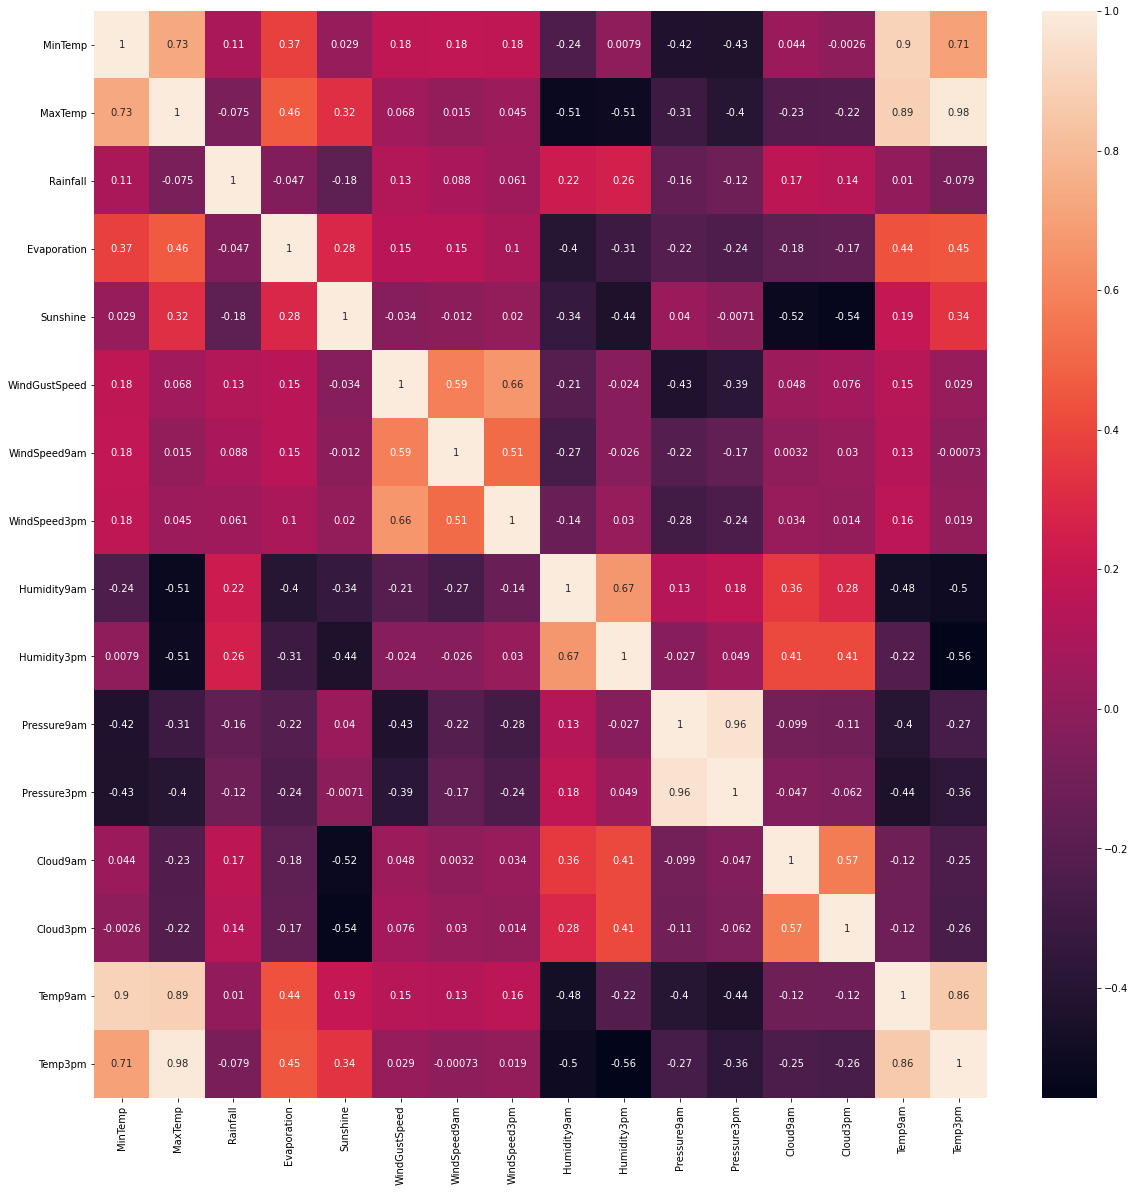

In [250]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [24]:
#MinTemp is highly correlated to maxtemp,temp9am,temp3am
#maxtemp is highest correlated to mintemp,temp9am,temp3am
#windgustspeed is correlated to windspeed3pm
#humidity9am is correlated to humidity3pm
#pressure9am is highly correlated to pressure3pm
#temp9am is highly correlated to temp3pm

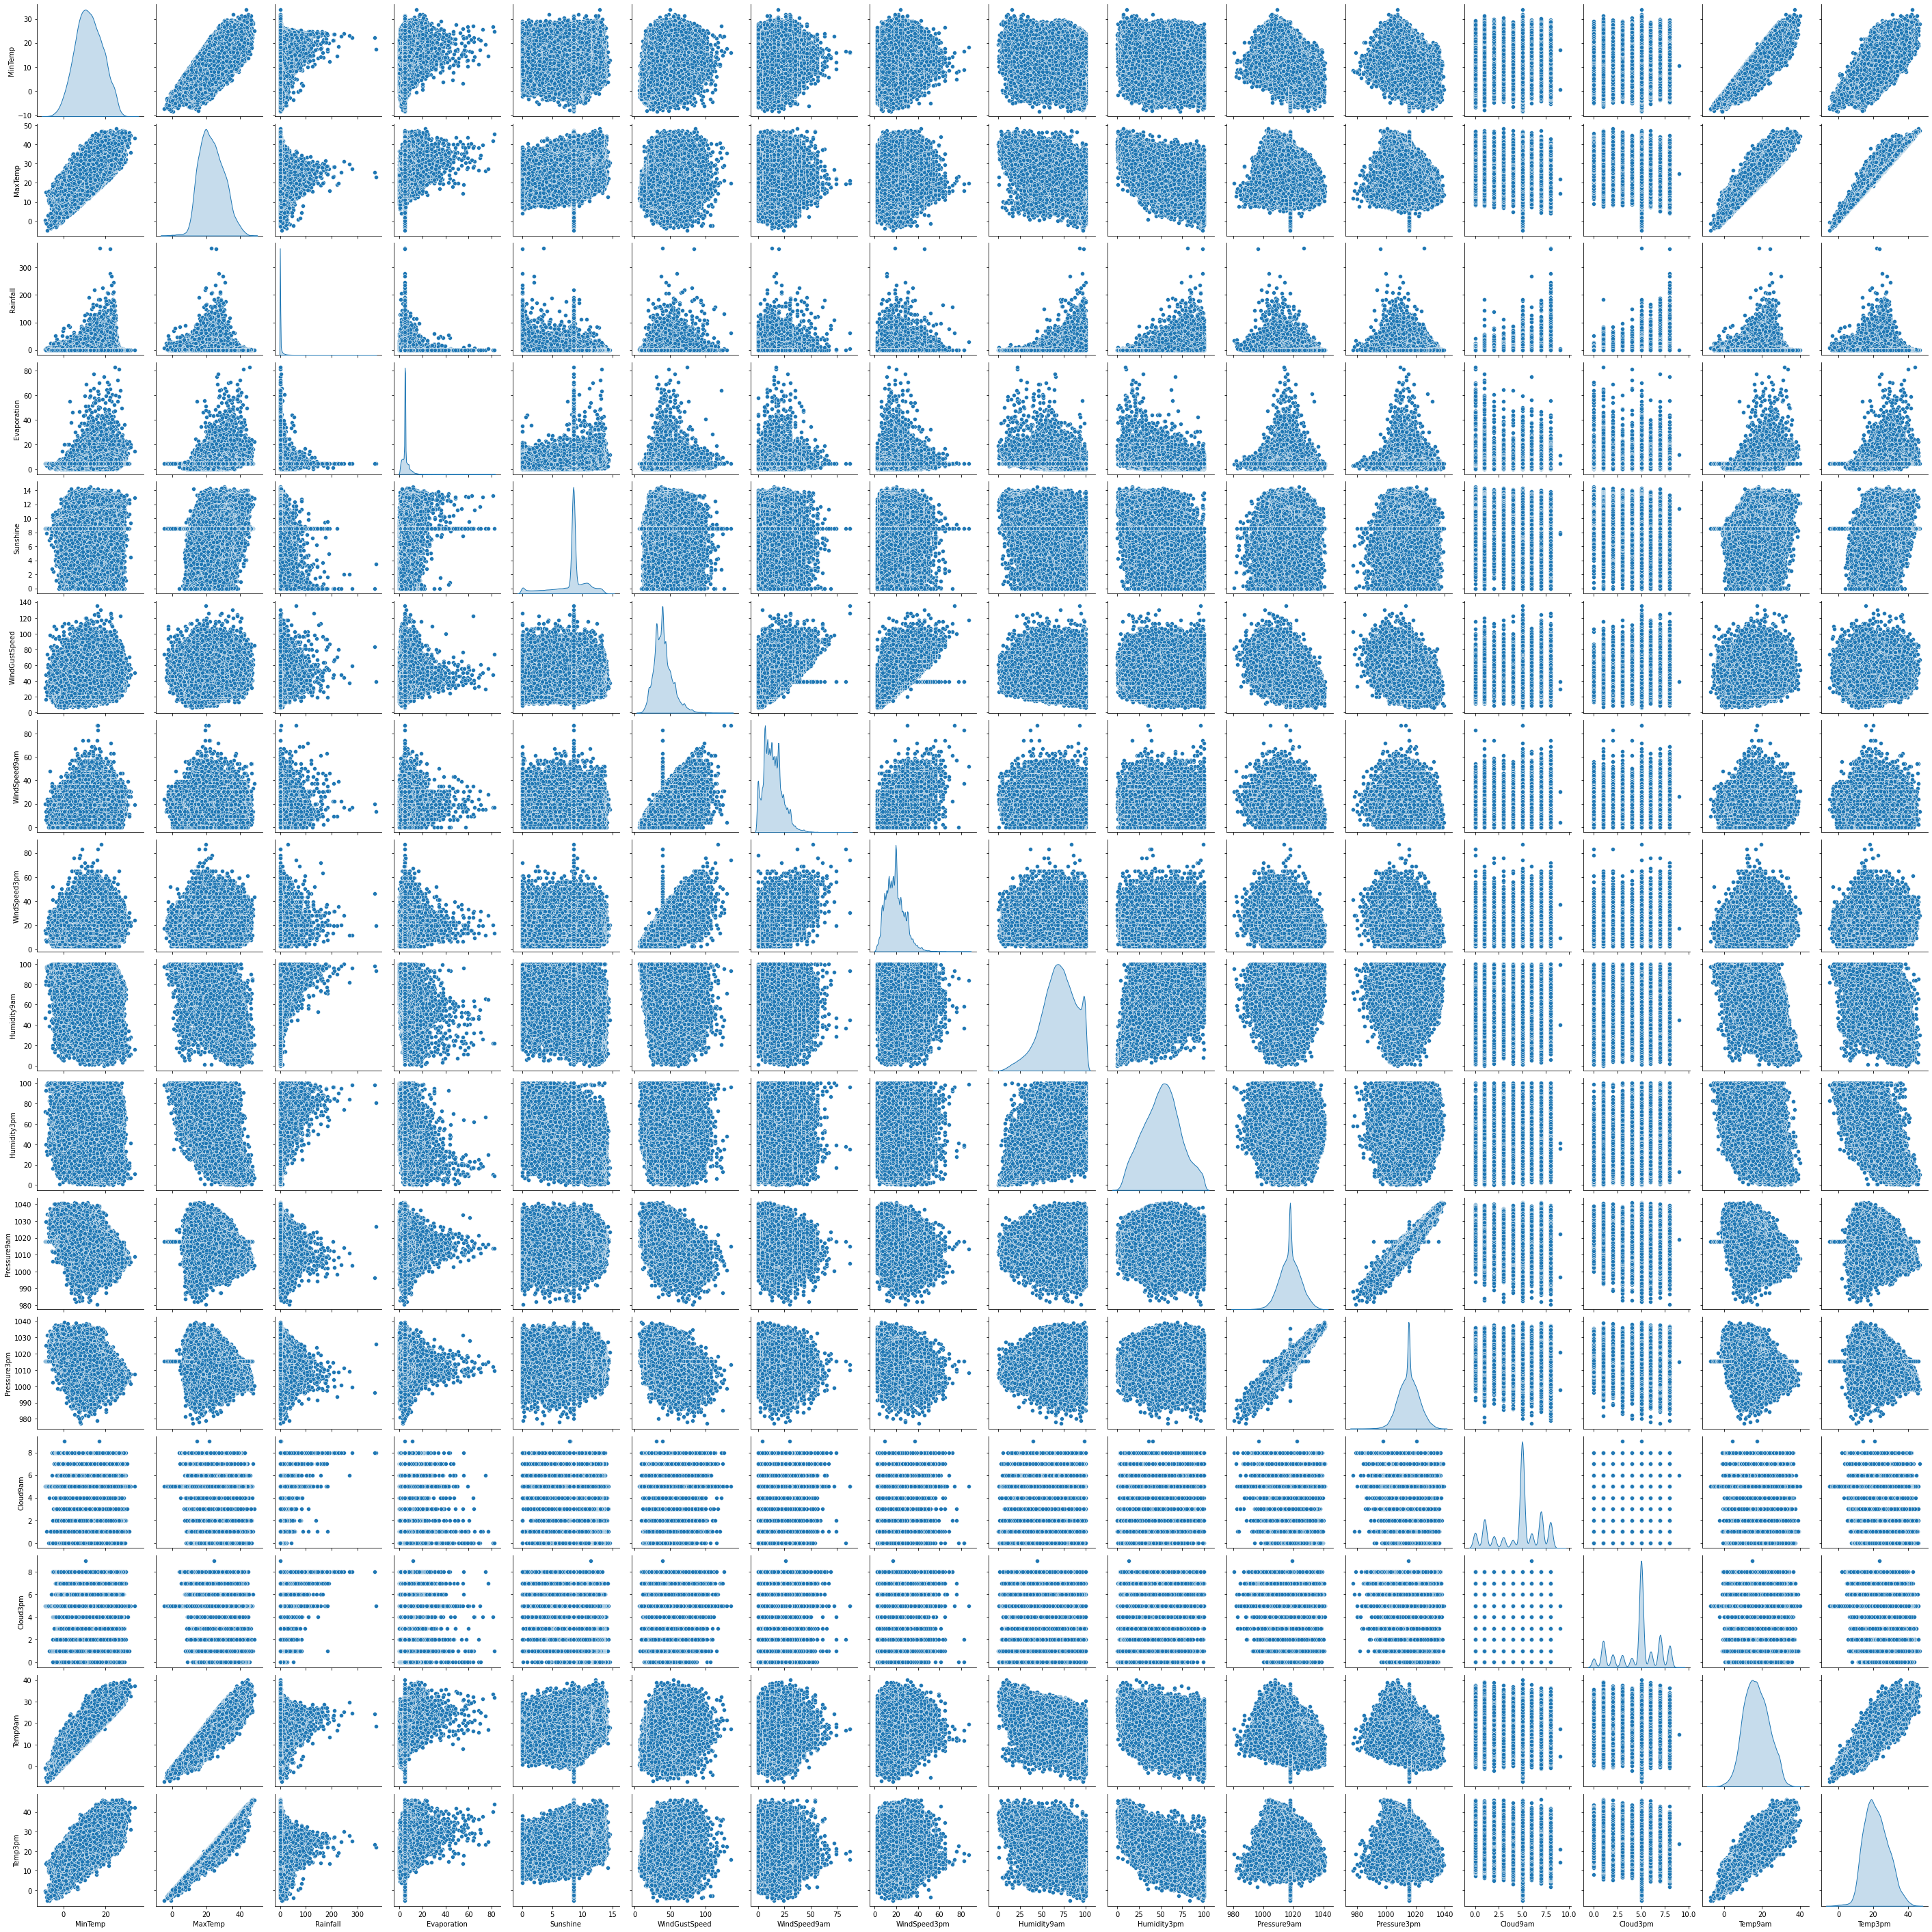

In [25]:
sns.pairplot(df,diag_kind='kde')
plt.show()

In [26]:
#MinTemp is highly correlated to maxtemp,temp9am,temp3am
#maxtemp is highest correlated to mintemp,temp9am,temp3am
#windgustspeed is correlated to windspeed3pm
#humidity9am is correlated to humidity3pm
#pressure9am is highly correlated to pressure3pm
#temp9am is highly correlated to temp3pm

In [27]:
#mintemp,maxtemp,temp9am,temp3pm,humidity3pm isalmost normal distributed
#evaporation

In [166]:
df.skew()

MinTemp          0.031002
MaxTemp          0.241379
Rainfall         9.986715
Evaporation      4.500619
Sunshine        -1.079946
WindGustSpeed    0.911217
WindSpeed9am     0.752401
WindSpeed3pm     0.689305
Humidity9am     -0.476219
Humidity3pm      0.035910
Pressure9am     -0.110093
Pressure3pm     -0.059367
Cloud9am        -0.544425
Cloud3pm        -0.540796
Temp9am          0.095836
Temp3pm          0.247196
dtype: float64

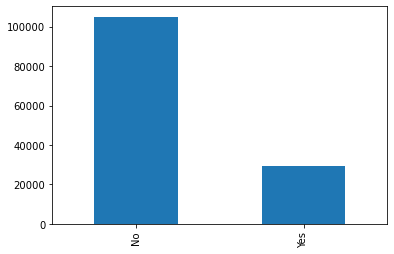

In [29]:
df['RainTomorrow'].value_counts().plot.bar()
plt.show()                                      #unevenity is more in raintomorrow#more values of no is there

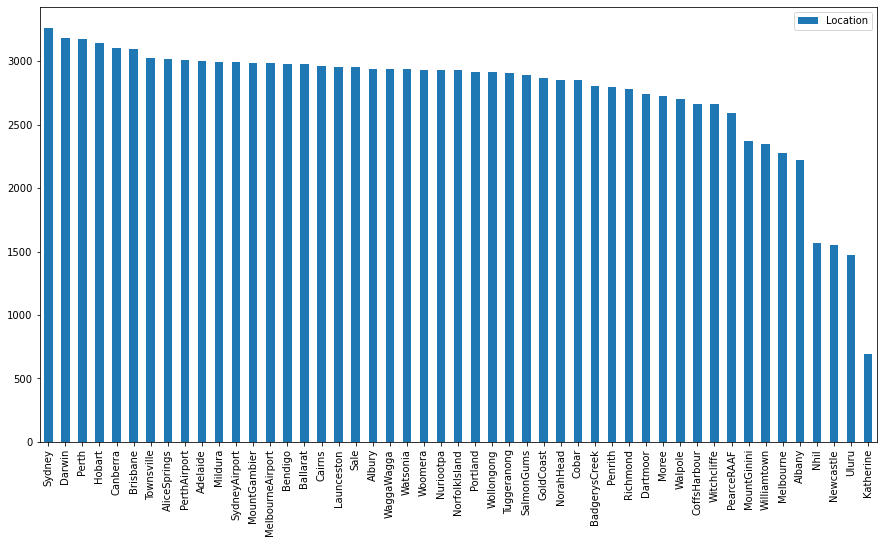

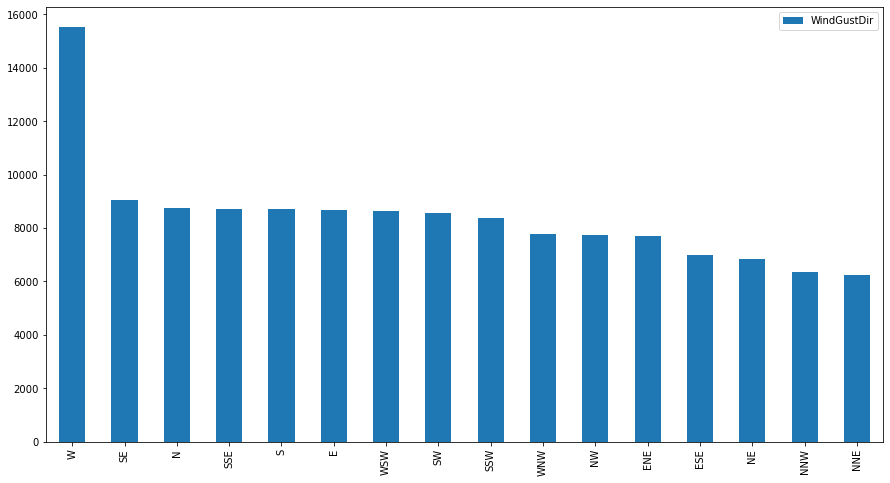

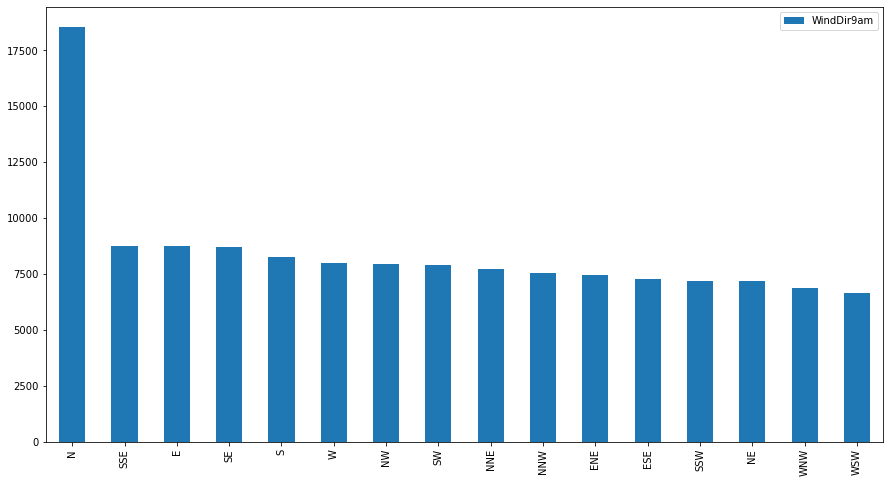

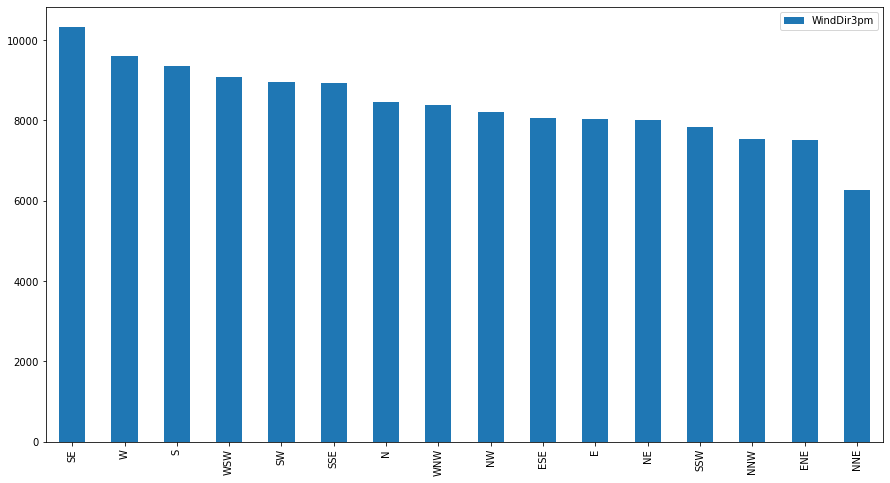

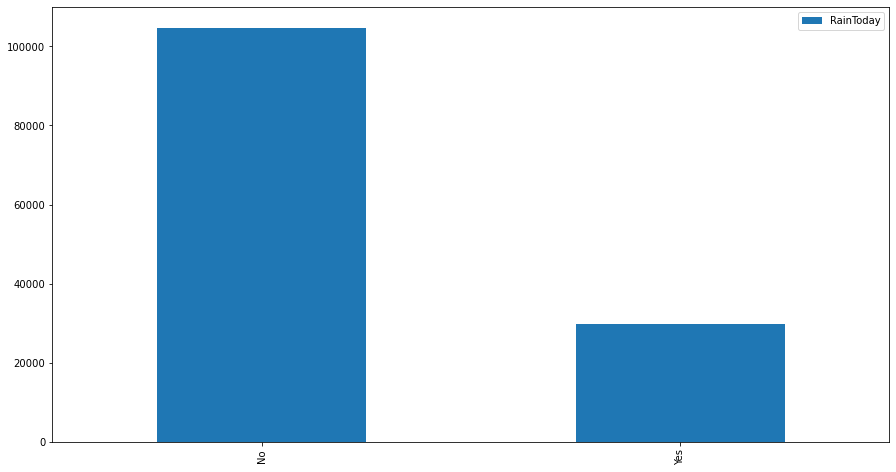

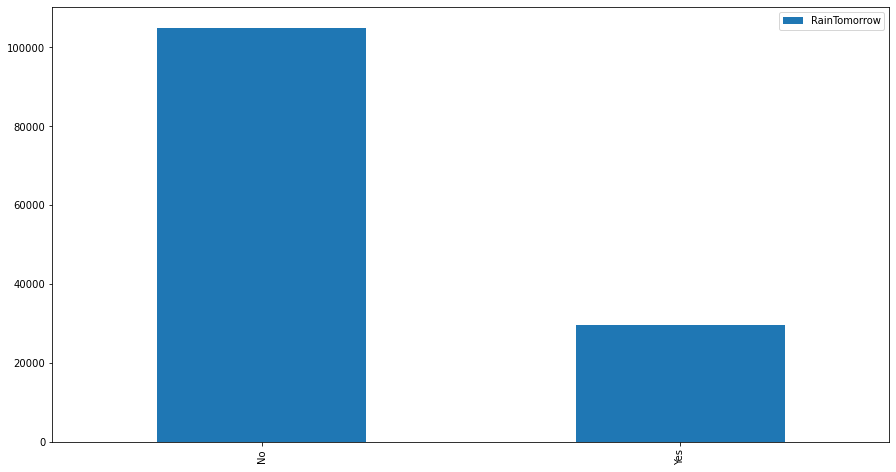

In [30]:
for  i in df.loc[:,df.dtypes==np.object]:
    df[i].value_counts().plot.bar(figsize=(15,8),label=i)
    plt.legend()
    plt.show()

In [31]:
#rain today data is also uneven

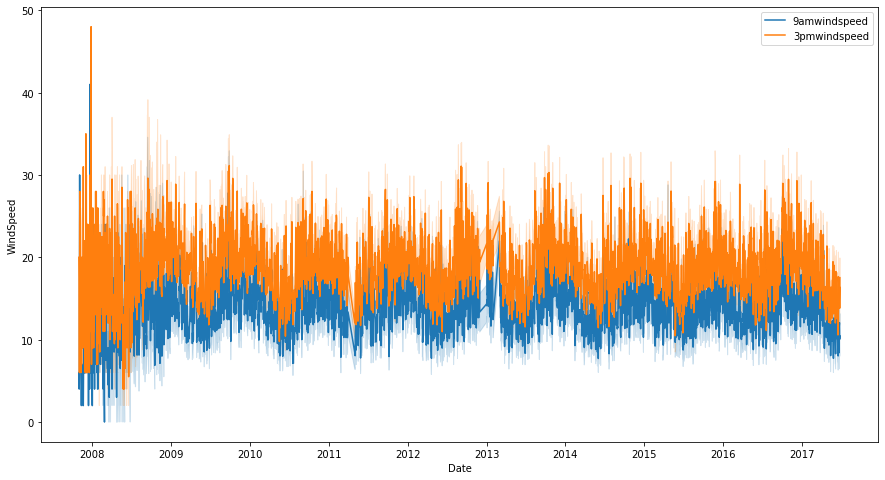

In [37]:
plt.figure(figsize=(15,8))
sns.lineplot(df['Date'],df['WindSpeed9am'],label='9amwindspeed')
sns.lineplot(df['Date'],df['WindSpeed3pm'],label='3pmwindspeed')
plt.legend()
plt.ylabel('WindSpeed')
plt.show()

In [35]:
#in 2008 wind speed was more as compared to following year,also windspeed at 9am is more than windspeed at 3pm

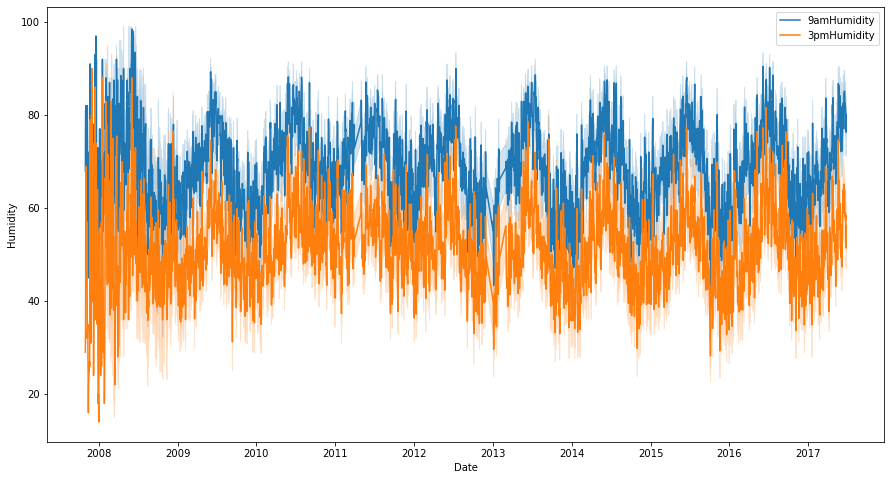

In [38]:
plt.figure(figsize=(15,8))
sns.lineplot(df['Date'],df['Humidity9am'],label='9amHumidity')
sns.lineplot(df['Date'],df['Humidity3pm'],label='3pmHumidity')
plt.legend()
plt.ylabel('Humidity')
plt.show()

In [ ]:
#humidity at 9am is more than at 3 pm ,also in 2008 humidity was more as compared to following years

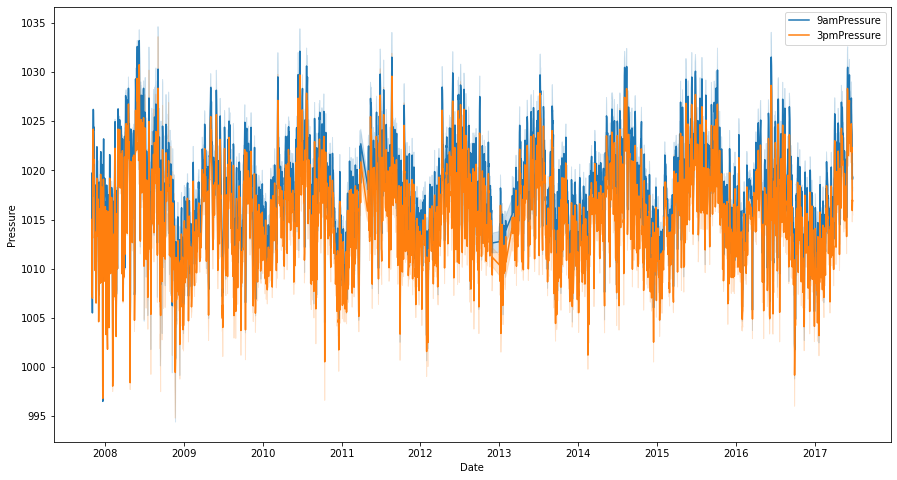

In [39]:
plt.figure(figsize=(15,8))
sns.lineplot(df['Date'],df['Pressure9am'],label='9amPressure')
sns.lineplot(df['Date'],df['Pressure3pm'],label='3pmPressure')
plt.legend()
plt.ylabel('Pressure')
plt.show()

In [ ]:
#pressure at 9am and 3pm is almost same and it is same for  all the years

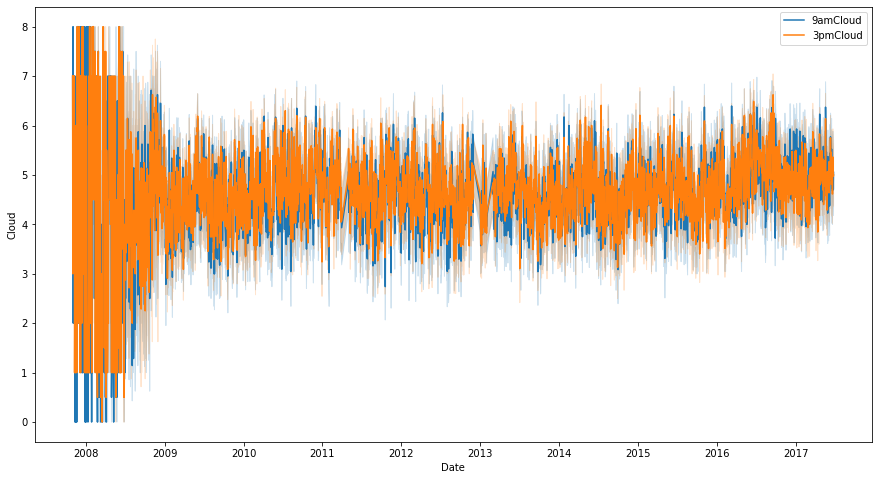

In [40]:
plt.figure(figsize=(15,8))
sns.lineplot(df['Date'],df['Cloud9am'],label='9amCloud',linewidth=1)
sns.lineplot(df['Date'],df['Cloud3pm'],label='3pmCloud',linewidth=1)
plt.legend()
plt.ylabel('Cloud')
plt.show()

In [ ]:
#cloud at 9am and 3pm is almost same and it is same for  all the years

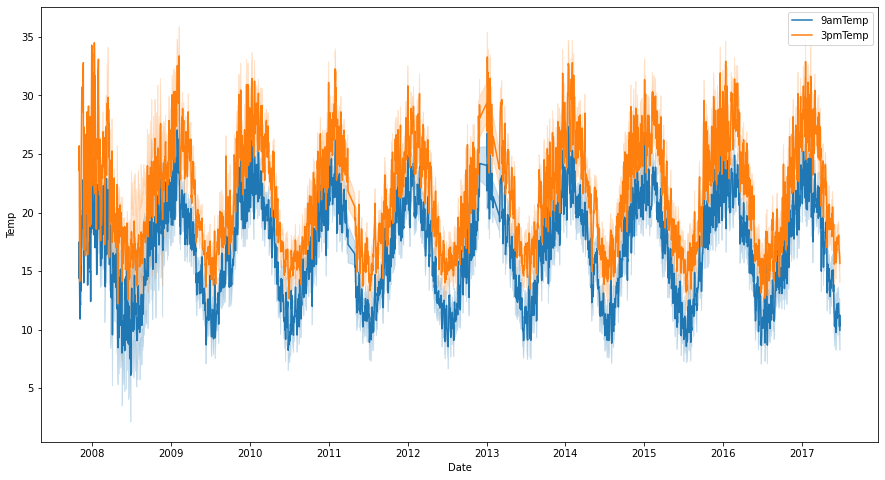

In [41]:
plt.figure(figsize=(15,8))
sns.lineplot(df['Date'],df['Temp9am'],label='9amTemp',linewidth=1)
sns.lineplot(df['Date'],df['Temp3pm'],label='3pmTemp',linewidth=1)
plt.legend()
plt.ylabel('Temp')
plt.show()

In [ ]:
#temp at 9am is less than at 3 pm ,also the temp is almost same for all years
#it is seeing a low in mid of the year

In [ ]:
#cloud and pressure are same at all times

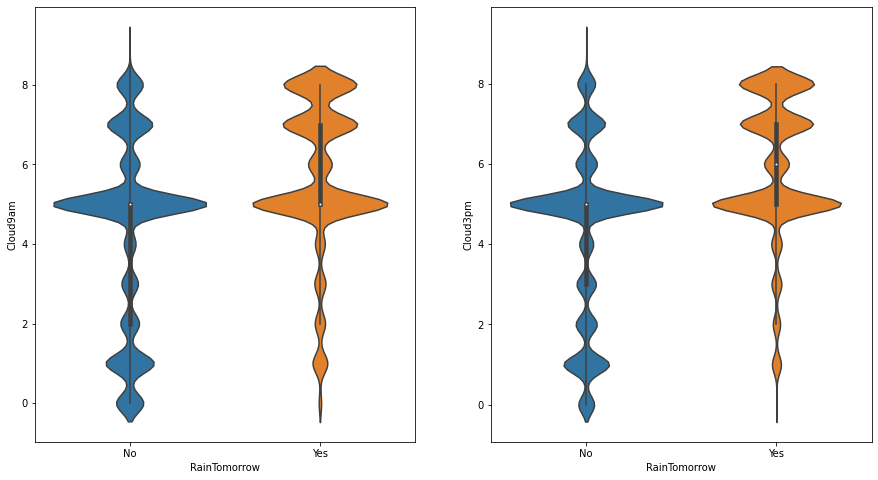

In [57]:
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
sns.violinplot(df['RainTomorrow'],df['Cloud9am'])
plt.subplot(1, 2, 2)
sns.violinplot(df['RainTomorrow'],df['Cloud3pm'])
plt.show()

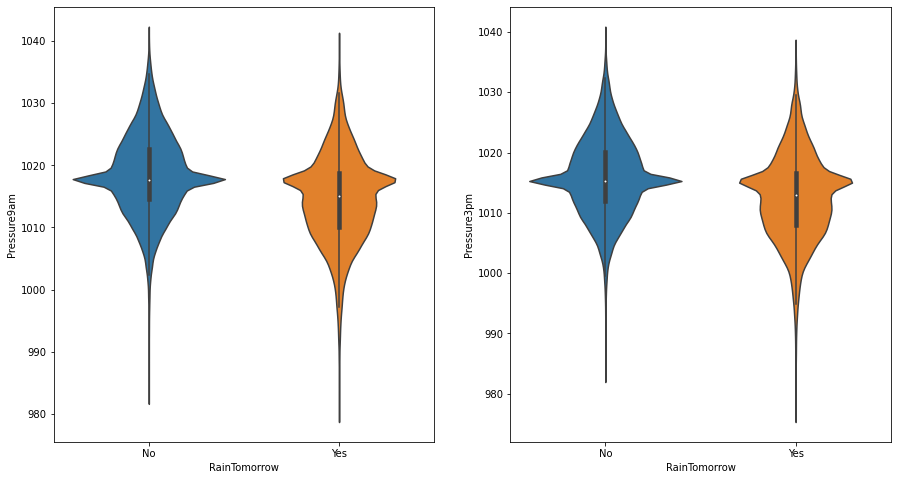

In [58]:
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
sns.violinplot(df['RainTomorrow'],df['Pressure9am'])
plt.subplot(1, 2, 2)
sns.violinplot(df['RainTomorrow'],df['Pressure3pm'])
plt.show()

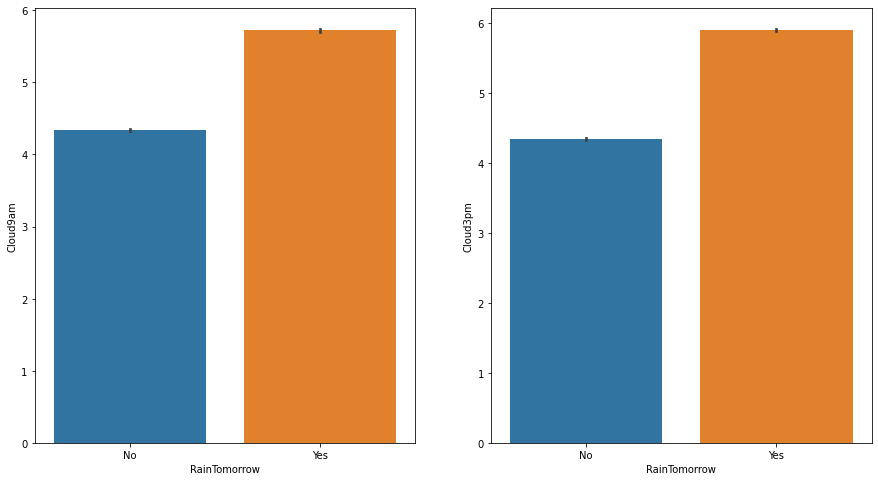

In [95]:
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
sns.barplot(df['RainTomorrow'],df['Cloud9am'])
plt.subplot(1, 2, 2)
sns.barplot(df['RainTomorrow'],df['Cloud3pm'])
plt.show()

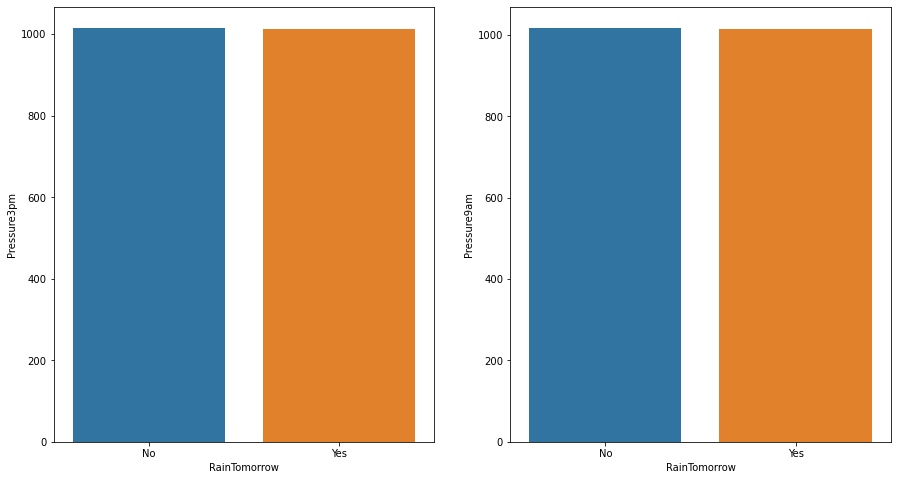

In [96]:
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
sns.barplot(df['RainTomorrow'],df['Pressure3pm'])
plt.subplot(1, 2, 2)
sns.barplot(df['RainTomorrow'],df['Pressure9am'])
plt.show()

In [ ]:
#when clouds are more, it is more likely to rain in both 9am or 3 pm case

In [ ]:
#pressure distribution is almost same for both raining and not raining prediction

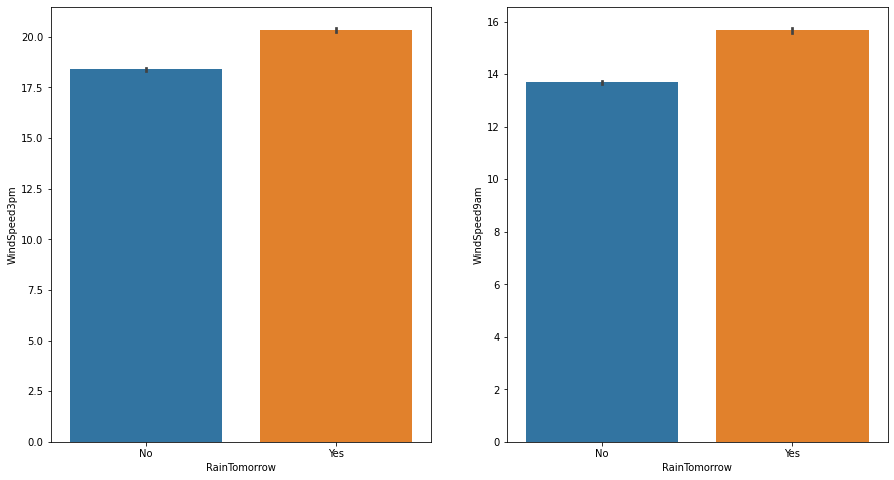

In [97]:
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
sns.barplot(df['RainTomorrow'],df['WindSpeed3pm'])
plt.subplot(1, 2, 2)
sns.barplot(df['RainTomorrow'],df['WindSpeed9am'])
plt.show()

In [ ]:
#wind speed is more when its likely to rain both in 9am,3pm

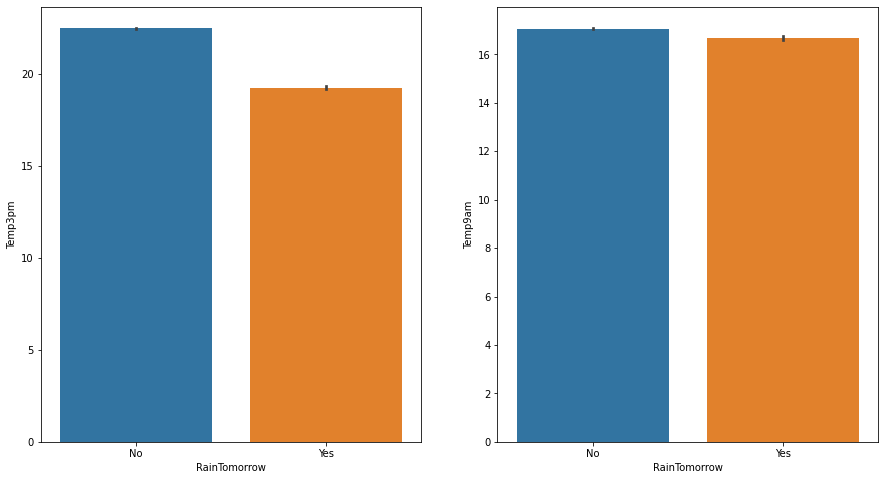

In [98]:
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
sns.barplot(df['RainTomorrow'],df['Temp3pm'])
plt.subplot(1, 2, 2)
sns.barplot(df['RainTomorrow'],df['Temp9am'])
plt.show()

In [ ]:
#at 9am temp is almost same
#at 3pm temp is low when raining

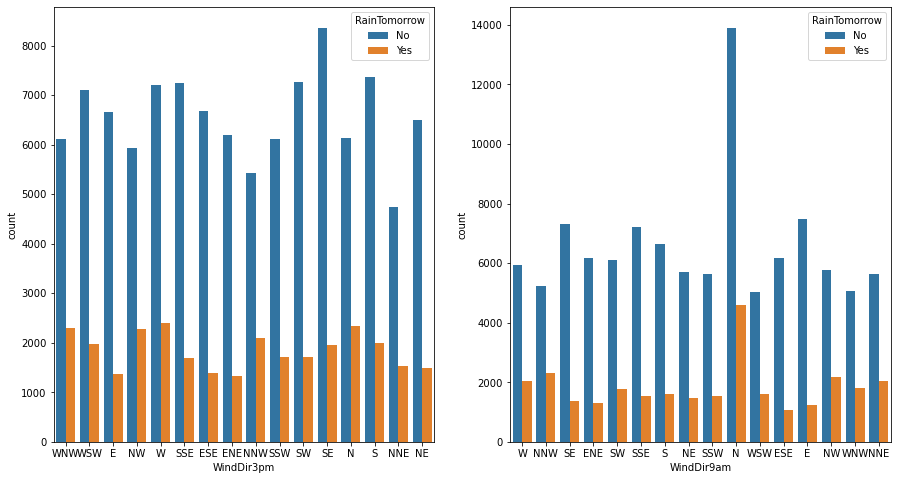

In [64]:
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
sns.countplot(df['WindDir3pm'],hue=df['RainTomorrow'])
plt.subplot(1, 2, 2)
sns.countplot(df['WindDir9am'],hue=df['RainTomorrow'])
plt.show()

In [ ]:
#at 9am wind direction is mostly North when its not gonna rain # is mostly north when its gonna rain
#at 3pm wind direction can be mostly North,west or WN when its gonna rain#at3pm wind direction is mostly SE when its not raining
#but data is not even 
#WindDir9am can be a good feature

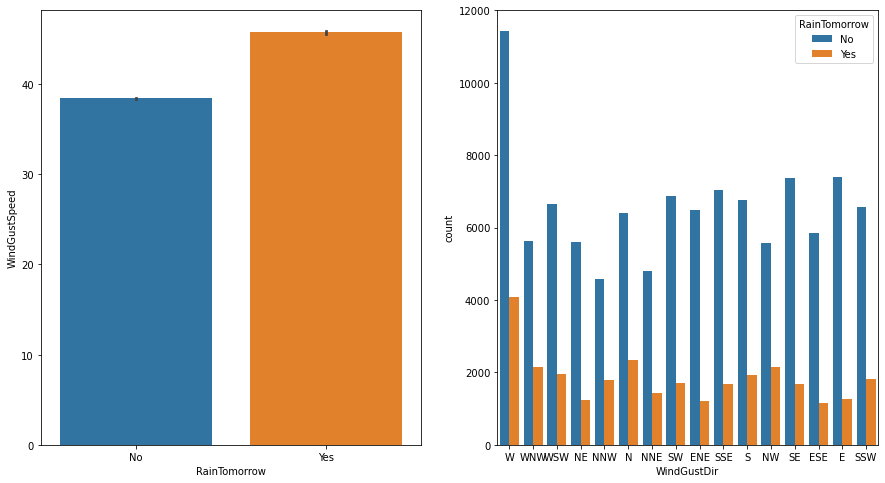

In [69]:
plt.figure(figsize=(15,8))
plt.subplot(121)
sns.barplot(df['RainTomorrow'],df['WindGustSpeed'])
plt.subplot(122)
sns.countplot(df['WindGustDir'],hue=df['RainTomorrow'])
plt.show()

In [ ]:
#windgustspeed is more when rain is to happen tomorrow
#windgustdir is almost same for both when its to rain or its not to rain
#windgustspeed is more helpful in raintomorrow

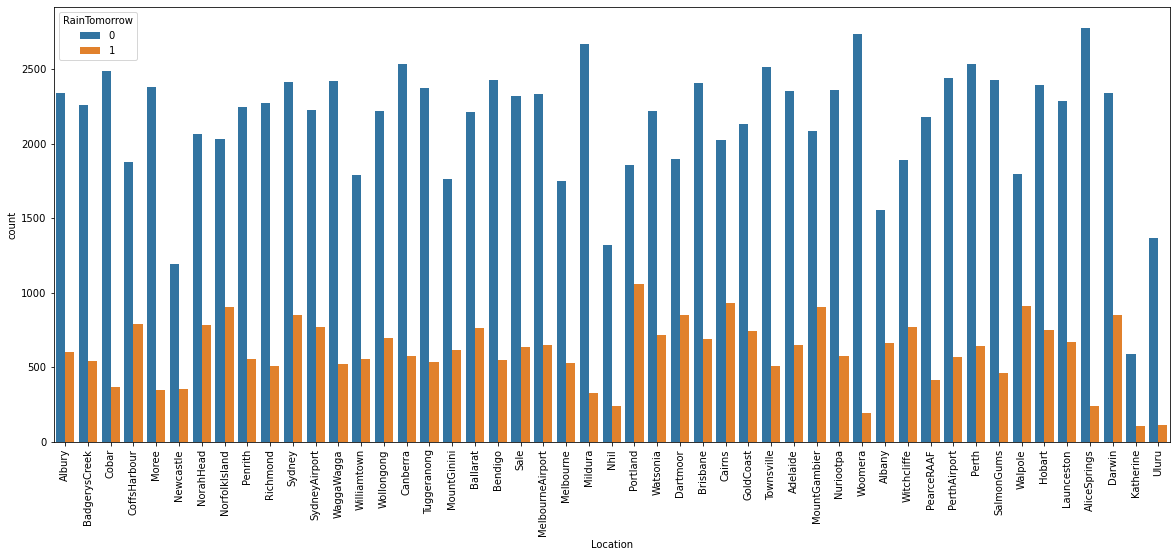

In [81]:
plt.figure(figsize=(20,8))
sns.countplot(df['Location'],hue=df['RainTomorrow'])
plt.xticks(rotation=90)
plt.show()                       #countrywise rain tomorrow plot

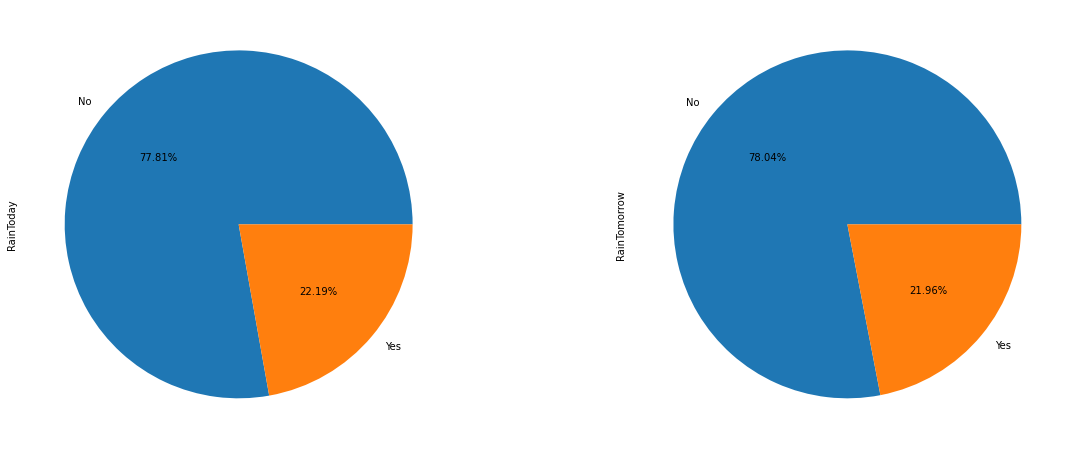

In [88]:
plt.figure(figsize=(20,8))
plt.subplot(121)
df['RainToday'].value_counts().plot.pie(autopct='%0.2f%%')
plt.subplot(122)
df['RainTomorrow'].value_counts().plot.pie(autopct='%0.2f%%')
plt.show()                                                        

In [ ]:
#rain today and rain tomorrow have almost same biased data

In [4]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [ ]:
#Doing label encoding of the categorical columns

In [37]:
le=LabelEncoder()
for i in df.loc[:,df.dtypes==np.object]:
    df[i]=le.fit_transform(df[i])

In [38]:
df.head()

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-12-01         2     13.4     22.9       0.6          4.8       8.5   
1 2008-12-02         2      7.4     25.1       0.0          4.8       8.5   
2 2008-12-03         2     12.9     25.7       0.0          4.8       8.5   
3 2008-12-04         2      9.2     28.0       0.0          4.8       8.5   
4 2008-12-05         2     17.5     32.3       1.0          4.8       8.5   

   WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \
0           13           44.0          13          14          20.0   
1           14           44.0           6          15           4.0   
2           15           46.0          13          15          19.0   
3            4           24.0           9           0          11.0   
4           13           41.0           1           7           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       5.0   
2          26.0         38.0         30.0       1007.6       1008.7       5.0   
3           9.0         45.0         16.0       1017.6       1012.8       5.0   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  
0       5.0     16.9     21.8          0             0  
1       5.0     17.2     24.3          0             0  
2       2.0     21.0     23.2          0             0  
3       5.0     18.1     26.5          0             0  
4       8.0     17.8     29.7          0             0

In [39]:
X=df.drop(['Date','RainTomorrow'],axis=1)
y=df['RainTomorrow']

In [40]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,train_size=0.75,random_state=1)

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
pipe=Pipeline((
('ss',StandardScaler()),
('pt',PowerTransformer()),
('lr',LogisticRegression())
))
pipe.fit(xtrain,ytrain)
a1=pipe.score(xtrain,ytrain)
print(a,a1)            #it is overfit model

0.8504220161673799

In [5]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [78]:
pipe=Pipeline((
('ss',StandardScaler()),
('pt',PowerTransformer()),
('rfr',RandomForestClassifier(n_estimators=100))
))
pipe.fit(xtrain,ytrain)
b=pipe.score(xtest,ytest)
b1=pipe.score(xtrain,ytrain)
print(b,b1)            #it is overfit model

0.8611804564907275 1.0


In [79]:
pipe=Pipeline((
('ss',StandardScaler()),
('pt',PowerTransformer()),
('rfr',AdaBoostClassifier(n_estimators=100))
))
pipe.fit(xtrain,ytrain)
c=pipe.score(xtest,ytest)
c1=pipe.score(xtrain,ytrain)
print(c,c1)

0.8511947218259629 0.8519149610667512


In [80]:
pipe=Pipeline((
('ss',StandardScaler()),
('pt',PowerTransformer()),
('rfr',GradientBoostingClassifier(n_estimators=100))
))
pipe.fit(xtrain,ytrain)
d=pipe.score(xtest,ytest)
d1=pipe.score(xtrain,ytrain)
print(d,d1)

0.8554446029481693 0.8558280993045512


In [81]:
pipe=Pipeline((
('ss',StandardScaler()),
('pt',PowerTransformer()),
('rfr',BaggingClassifier(n_estimators=100))
))
pipe.fit(xtrain,ytrain)
e=pipe.score(xtest,ytest)
e1=pipe.score(xtrain,ytrain)
print(e,e1)

0.8614776509747979 1.0


In [82]:
pipe=Pipeline((
('ss',StandardScaler()),
('pt',PowerTransformer()),
('dtc',DecisionTreeClassifier(max_depth=5))
))
pipe.fit(xtrain,ytrain)
f=pipe.score(xtest,ytest)
f1=pipe.score(xtrain,ytrain)
print(f,f1)

0.8409415121255349 0.8415129480295616


In [83]:
pipe=Pipeline((
('ss',StandardScaler()),
('pt',PowerTransformer()),
('xg',XGBClassifier(max_depth=7,gamma=2))
))
pipe.fit(xtrain,ytrain)
g=pipe.score(xtest,ytest)
g1=pipe.score(xtrain,ytrain)
print(g,g1)

[17:35:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8660841654778887 0.9086703255334747


In [50]:
l=['LogisticRegression','RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier','BaggingClassifier','DecisionTreeClassifier','XGBClassifier']
l1=[a,b,c,d,e,f,g]
l2=[a1,b1,c1,d1,e1,f1,g1]
comp=pd.DataFrame({'model_name':l,'test_score':l1,'training_score':l2})
comp.sort_values(by='test_score',ascending=False)

model_name     score
6               XGBClassifier  0.866084
1      RandomForestClassifier  0.862458
4           BaggingClassifier  0.861448
3  GradientBoostingClassifier  0.855445
2          AdaBoostClassifier  0.851195
0          LogisticRegression  0.850422
5      DecisionTreeClassifier  0.840942

In [ ]:
#Cheking XGBoost,BaggingClassifier and RandomForest cross_value_score

In [56]:
#RandomForest cv score
xgb=XGBClassifier(max_depth=7,gamma=2)
bc=BaggingClassifier(n_estimators=100)
rfr=RandomForestClassifier(n_estimators=100)
from sklearn.model_selection import cross_val_score,GridSearchCV
cross1=cross_val_score(estimator=xgb,X=X,y=y,cv=10,scoring='accuracy')
cross1

[14:27:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:27:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:27:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:27:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

array([0.84694257, 0.75956609, 0.7844565 , 0.83282562, 0.84107289,
       0.74849543, 0.66052456, 0.70042351, 0.7829705 , 0.84909726])

In [61]:
cross1.mean()

0.780637491641281

In [57]:
from sklearn.model_selection import cross_val_score,GridSearchCV
cross2=cross_val_score(estimator=rfr,X=X,y=y,cv=10,scoring='accuracy')
cross2

array([0.85102905, 0.8110558 , 0.84880006, 0.83527751, 0.85310944,
       0.84961736, 0.8368378 , 0.86053942, 0.83936399, 0.85652723])

In [62]:
cross2.mean()

0.8442157664016643

In [59]:
cross3=cross_val_score(estimator=bc,X=X,y=y,cv=10,scoring='accuracy')
cross3

array([0.85214355, 0.7838621 , 0.84493647, 0.83371722, 0.84976596,
       0.84367338, 0.82881343, 0.84709117, 0.83958689, 0.85556133])

In [63]:
cross3.mean()

0.8317185526413551

In [60]:
gb=GradientBoostingClassifier(n_estimators=100)
cross4=cross_val_score(estimator=gb,X=X,y=y,cv=10,scoring='accuracy')
cross4

array([0.84850286, 0.83148822, 0.84508507, 0.83119102, 0.84969166,
       0.84716547, 0.74775243, 0.81707408, 0.84211308, 0.85712163])

In [64]:
cross4.mean()

0.8317185526413551

In [66]:
#from here we can choose randomforest for further GridSearchCV
rfr=RandomForestClassifier()
param=[{'n_estimators':[10,100,500,1000],'criterion':['entropy','gini'],'max_depth':[3,5,7,9]}]
grid=GridSearchCV(estimator=rfr,param_grid=param,scoring='accuracy',n_jobs=-1)
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': [3, 5, 7, 9],
                          'n_estimators': [10, 100, 500, 1000]}],
             scoring='accuracy')

In [67]:
grid.score(xtest,ytest)

0.8537803138373752

In [68]:
grid.best_estimator_

RandomForestClassifier(max_depth=9, n_estimators=500)

In [322]:
pipe=Pipeline((
('ss',StandardScaler()),
('pt',PowerTransformer()),
('rfr',RandomForestClassifier(n_estimators=500))
))
pipe.fit(xtrain,ytrain)

Pipeline(steps=[('ss', StandardScaler()), ('pt', PowerTransformer()),
                ('rfr', RandomForestClassifier(n_estimators=500))])

In [323]:
pipe.score(xtest,ytest)

0.8629339039467427

In [324]:
pipe.score(xtrain,ytrain)          #it is still overfitting

1.0

In [ ]:
#cross_val and grid search are not improving the model much

In [74]:
#Now analysis the model by removing outliers

In [17]:
df=pd.read_csv('C:\\Users\\This PC\\Downloads\\rain_in_australia\\weatherAUS.csv')
df.head()      

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No  
3       NaN     18.1     26.5        No           No  
4       8.0     17.8     29.7        No           No

In [18]:
df['Date']=pd.to_datetime(df['Date'],errors='coerce') 

In [19]:
c=pd.DataFrame(df.dtypes,columns=['dtype'])                               #Again checking the converted dtypes
n=pd.DataFrame(df.isna().sum()*100/len(df),columns=['null_value_per'])
s=pd.concat([c,n],axis=1).T

In [20]:
l=[]
for i in s.columns[2:]:
    if (s.iloc[1][i]<6):
        l.append(i)

In [21]:
df.dropna(subset=l,axis=0,inplace=True)

In [22]:
df.isna().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           0.000000
MaxTemp           0.000000
Rainfall          0.000000
Evaporation      41.682889
Sunshine         45.957352
WindGustDir       4.468385
WindGustSpeed     4.458727
WindDir9am        5.614830
WindDir3pm        0.000000
WindSpeed9am      0.000000
WindSpeed3pm      0.000000
Humidity9am       0.000000
Humidity3pm       0.000000
Pressure9am       8.332714
Pressure3pm       8.285162
Cloud9am         37.275429
Cloud3pm         38.302994
Temp9am           0.000000
Temp3pm           0.000000
RainToday         0.000000
RainTomorrow      0.000000
dtype: float64

In [23]:
#now Replacing the Null values with median values
for i in ['Evaporation','Sunshine','WindGustSpeed','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm']:
    df[i].fillna(df[i].median(),inplace=True)

In [24]:
for i in ['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']:
    df[i].fillna(df[i].mode(),inplace=True)

In [25]:
#the null values of windgustdir,winddir9am didnt get replaced.so replacing them

In [26]:
for i in ['WindGustDir','WindDir9am']:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [27]:
df.isna().sum()*100/len(df)       #now there are no null values in dataset

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [14]:
for i in df.loc[:,df.dtypes!=np.object][1:]:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    ll=q1-1.5*iqr
    ul=q3+1.5*iqr
    a=df[(df[i]<ll) | (df[i]>ul)].index
    df.drop(a,axis=0,inplace=True)

In [312]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
1 2008-12-02   Albury      7.4     25.1       0.0          4.8       8.5   
3 2008-12-04   Albury      9.2     28.0       0.0          4.8       8.5   
5 2008-12-06   Albury     14.6     29.7       0.2          4.8       8.5   
7 2008-12-08   Albury      7.7     26.7       0.0          4.8       8.5   
9 2008-12-10   Albury     13.1     30.1       1.4          4.8       8.5   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
1         WNW           44.0        NNW        WSW           4.0   
3          NE           24.0         SE          E          11.0   
5         WNW           56.0          W          W          19.0   
7           W           35.0        SSE          W           6.0   
9           W           28.0          S        SSE          15.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
1          22.0         44.0         25.0       1010.6       1007.8       5.0   
3           9.0         45.0         16.0       1017.6       1012.8       5.0   
5          24.0         55.0         23.0       1009.2       1005.4       5.0   
7          17.0         48.0         19.0       1013.4       1010.1       5.0   
9          11.0         58.0         27.0       1007.0       1005.7       5.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
1       5.0     17.2     24.3        No           No  
3       5.0     18.1     26.5        No           No  
5       5.0     20.6     28.9        No           No  
7       5.0     16.3     25.5        No           No  
9       5.0     20.1     28.2       Yes           No

In [15]:
df.shape

(27768, 23)

In [22]:
le=LabelEncoder()
for i in df.loc[:,df.dtypes==np.object]:
    df[i]=le.fit_transform(df[i])

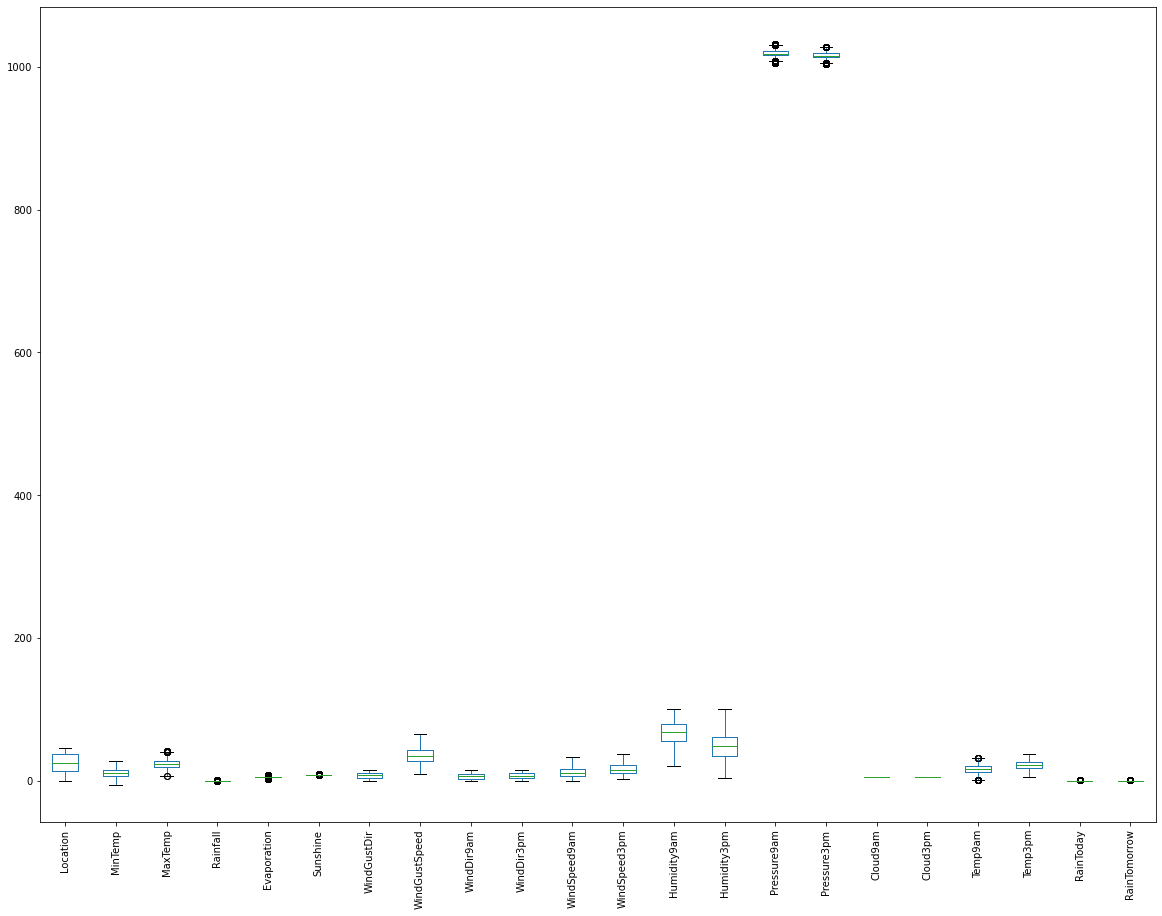

In [23]:
df.plot.box(figsize=(20,15))
plt.xticks(rotation=90)
plt.show()

In [175]:
#rebuilding models without outliers

In [24]:
X1=df.drop(['Date','RainTomorrow'],axis=1)
y1=df['RainTomorrow']

In [25]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(X1,y1,train_size=0.75,random_state=1)

In [38]:
pipe=Pipeline((
('ss',StandardScaler()),
('pt',PowerTransformer()),
('lr',LogisticRegression())
))
pipe.fit(xtrain1,ytrain1)
a=pipe.score(xtest1,ytest1)
a1=pipe.score(xtrain1,ytrain1)
print(a,a1)

0.8853356381446269 0.8836070296744454


In [39]:
pipe=Pipeline((
('ss',StandardScaler()),
('pt',PowerTransformer()),
('rfr',RandomForestClassifier(n_estimators=100))
))
pipe.fit(xtrain1,ytrain1)
b=pipe.score(xtest1,ytest1)
b1=pipe.score(xtrain1,ytrain1)
print(b,b1)                                       #random forest is giving 89per accuracy#it is still overfit model

0.8958513396715644 1.0


In [40]:
pipe=Pipeline((
('ss',StandardScaler()),
('pt',PowerTransformer()),
('rfr',AdaBoostClassifier(n_estimators=100))
))
pipe.fit(xtrain1,ytrain1)
c=pipe.score(xtest1,ytest1)
c1=pipe.score(xtrain1,ytrain1)              #adaboost is giving 89 per accuracy plus it is not overfitting
print(c,c1)

0.890089311437626 0.8908575818688178


In [41]:
pipe=Pipeline((
('ss',StandardScaler()),
('pt',PowerTransformer()),
('rfr',GradientBoostingClassifier(n_estimators=100))
))
pipe.fit(xtrain1,ytrain1)
d=pipe.score(xtest1,ytest1)
d1=pipe.score(xtrain1,ytrain1)         #since boosting improves overfitting model so ada and gradient boosting are doing better
print(d,d1)                                           #gradientboost is giving 89 per accuracy plus it is not overfitting

0.8941227312013829 0.8966196101027561


In [42]:
pipe=Pipeline((
('ss',StandardScaler()),
('pt',PowerTransformer()),
('rfr',BaggingClassifier(n_estimators=100))
))
pipe.fit(xtrain1,ytrain1)
e=pipe.score(xtest1,ytest1)
e1=pipe.score(xtrain1,ytrain1)
print(e,e1)                                    #its overfit model so no bagging technique will work

0.8936905790838375 1.0


In [43]:
pipe=Pipeline((
('ss',StandardScaler()),
('pt',PowerTransformer()),
('dtc',DecisionTreeClassifier(max_depth=5))
))
pipe.fit(xtrain1,ytrain1)
f=pipe.score(xtest1,ytest1)
f1=pipe.score(xtrain1,ytrain1)
print(f,f1)

0.8895131086142322 0.8892250072025353


In [44]:
pipe=Pipeline((
('ss',StandardScaler()),
('pt',PowerTransformer()),
('xg',XGBClassifier(max_depth=7,gamma=2))
))
pipe.fit(xtrain1,ytrain1)
g=pipe.score(xtest1,ytest1)
g1=pipe.score(xtrain1,ytrain1)
print(g,g1)                               #it also has a varience error but less than bagging models

[21:47:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8889369057908384 0.9609142418131182


In [45]:
l=['LogisticRegression','RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier','BaggingClassifier','DecisionTreeClassifier','XGBClassifier']
l1=[a,b,c,d,e,f,g]
l2=[a1,b1,c1,d1,e1,f1,g1]
comp=pd.DataFrame({'model_name':l,'test_score':l1,'training_score':l2})
comp.sort_values(by='test_score',ascending=False)

model_name  test_score  training_score
1      RandomForestClassifier    0.895851        1.000000
3  GradientBoostingClassifier    0.894123        0.896620
4           BaggingClassifier    0.893691        1.000000
2          AdaBoostClassifier    0.890089        0.890858
5      DecisionTreeClassifier    0.889513        0.889225
6               XGBClassifier    0.888937        0.960914
0          LogisticRegression    0.885336        0.883607

In [ ]:
#now feature selection can be done

In [29]:
from yellowbrick.target import FeatureCorrelation

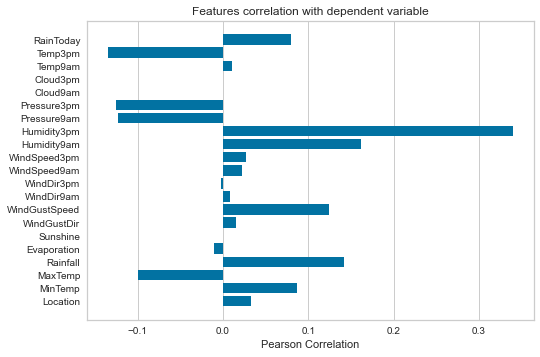

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [30]:
features=list(X1.columns)
visualizer = FeatureCorrelation(labels = features)
visualizer.fit(X1, y1)
visualizer.poof()

In [46]:
#considering columns with highest correlation
Xn=df[['Humidity3pm','RainToday','Pressure9am', 'Pressure3pm','Rainfall','WindGustSpeed','WindSpeed9am', 'WindSpeed3pm','Humidity9am','MaxTemp','MinTemp','Temp3pm','Location']]
yn=df['RainTomorrow']

In [47]:
xtrain11,xtest11,ytrain11,ytest11=train_test_split(Xn,yn,train_size=0.75,random_state=1)

In [34]:
#only Gradient ad adaboosting will be done

In [48]:
pipe=Pipeline((
('ss',StandardScaler()),
('pt',PowerTransformer()),
('rfr',AdaBoostClassifier(n_estimators=100))
))
pipe.fit(xtrain11,ytrain11)
a=pipe.score(xtest11,ytest11)
a1=pipe.score(xtrain11,ytrain11)              #adaboost is giving 89 per accuracy plus it is not overfitting
print(a,a1)

0.8876404494382022 0.8904734466532219


In [49]:
pipe=Pipeline((
('ss',StandardScaler()),
('pt',PowerTransformer()),
('rfr',GradientBoostingClassifier(n_estimators=100))
))
pipe.fit(xtrain11,ytrain11)
d=pipe.score(xtest11,ytest11)
d1=pipe.score(xtrain11,ytrain11)        
print(d,d1)                      

0.8936905790838375 0.8971477960242005


In [37]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [50]:
gbr=GradientBoostingClassifier()
sfs=SequentialFeatureSelector(estimator=gbr,k_features=15,scoring='accuracy',n_jobs=-1)
sfs.fit(xtrain1,ytrain1)

SequentialFeatureSelector(estimator=GradientBoostingClassifier(), k_features=15,
                          n_jobs=-1, scoring='accuracy')

In [52]:
sfs.k_feature_names_

('Location',
 'Rainfall',
 'Evaporation',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp3pm',
 'RainToday')

In [66]:
Xn=df[['Location',
 'Rainfall',
 'Evaporation',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp3pm',
 'RainToday']]
yn=df['RainTomorrow']

In [67]:
xtrain11,xtest11,ytrain11,ytest11=train_test_split(Xn,yn,train_size=0.75,random_state=1)

In [68]:
pipe=Pipeline((
('ss',StandardScaler()),
('pt',PowerTransformer()),
('rfr',GradientBoostingClassifier(n_estimators=100))
))
pipe.fit(xtrain11,ytrain11)
d=pipe.score(xtest11,ytest11)
d1=pipe.score(xtrain11,ytrain11)        
print(d,d1)

0.8948429847306252 0.8958993565735138


In [ ]:
#features selection is also not creating a much of impact